## **Task 3**

In [13]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/MachineLearningRating_v3.txt',delimiter='|')
df.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_3020\35747626.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt',delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


#### **1. H₀:There are no risk differences across provinces** 

In [6]:
# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=["Province", "TotalClaims", "PolicyID"])

In [8]:
# Create a binary column for whether a claim occurred
df_clean["HasClaim"] = df_clean["TotalClaims"] > 0

# Group by province and compute totals
grouped = df_clean.groupby("Province").agg(
    total_policies=("PolicyID", "nunique"),
    num_claims=("HasClaim", "sum")
)

# Calculate Claim Frequency
grouped["claim_frequency"] = grouped["num_claims"] / grouped["total_policies"]

# For claim severity, filter only rows with claims
df_with_claims = df_clean[df_clean["HasClaim"]]

# Compute claim severity per province
severity = df_with_claims.groupby("Province").agg(
    claim_severity=("TotalClaims", "mean")
)

# Merge back into grouped table
grouped = grouped.merge(severity, on="Province")
print(grouped)

               total_policies  num_claims  claim_frequency  claim_severity
Province                                                                  
Eastern Cape              319          50         0.156740    27128.533277
Free State                 54          11         0.203704    32265.661085
Gauteng                  2578        1322         0.512801    22243.878396
KwaZulu-Natal            1370         483         0.352555    29609.487473
Limpopo                   181          67         0.370166    15171.294187
Mpumalanga                382         128         0.335079    15979.553421
North West               1117         349         0.312444    16963.467035
Northern Cape              55           8         0.145455    11186.313596
Western Cape              947         370         0.390707    28095.849881


In [11]:
# Create a contingency table: [claims, no_claims] per province
contingency = pd.DataFrame({
    "claims": grouped["num_claims"],
    "no_claims": grouped["total_policies"] - grouped["num_claims"]
})
chi2, p_val_chi2, _, _ = chi2_contingency(contingency)

print(f"Chi-square test p-value for claim frequency: {p_val_chi2:.4f}")

Chi-square test p-value for claim frequency: 0.0000


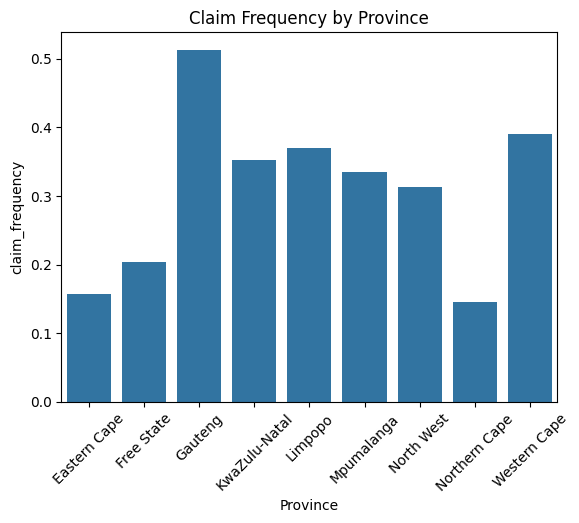

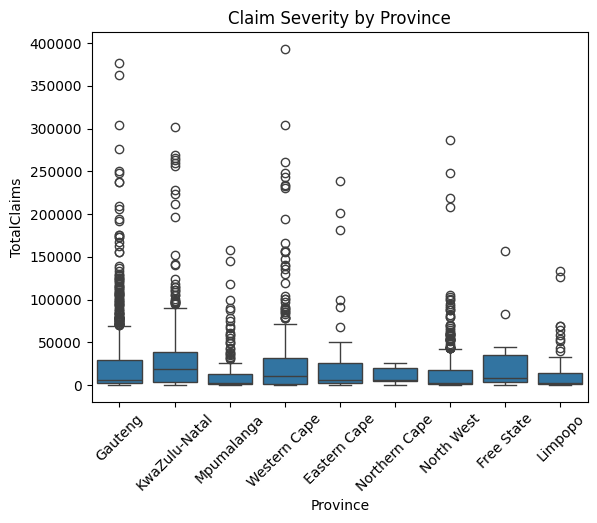

In [12]:
# Barplot for claim frequency
sns.barplot(x=grouped.index, y=grouped["claim_frequency"])
plt.xticks(rotation=45)
plt.title("Claim Frequency by Province")
plt.show()

# Boxplot for claim severity
sns.boxplot(x="Province", y="TotalClaims", data=df_with_claims)
plt.xticks(rotation=45)
plt.title("Claim Severity by Province")
plt.show()

#### **2. H₀:There are no risk differences between zip codes**

In [16]:
# Make sure each PolicyID is only counted once per PostalCode
df_unique_policies = df_clean.drop_duplicates(subset=["PolicyID", "PostalCode"])

# Recalculate HasClaim correctly
df_unique_policies["HasClaim"] = df_unique_policies["TotalClaims"] > 0

# Frequency table with counts
zip_freq = df_unique_policies.groupby("PostalCode").agg(
    total_policies=("PolicyID", "nunique"),
    num_claims=("HasClaim", "sum")
)
zip_freq["no_claims"] = zip_freq["total_policies"] - zip_freq["num_claims"]

# Drop any rows with negative or zero total policies (sanity check)
zip_freq = zip_freq[zip_freq["no_claims"] >= 0]

# Chi-square contingency table
contingency = zip_freq[["num_claims", "no_claims"]].astype(int)

from scipy.stats import chi2_contingency
chi2, p_val_chi2, _, _ = chi2_contingency(contingency)

print(f"Chi-square p-value (claim frequency across zip codes): {p_val_chi2:.4f}")


Chi-square p-value (claim frequency across zip codes): 0.0000


C:\Users\hanna\AppData\Local\Temp\ipykernel_3020\2815931556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_policies["HasClaim"] = df_unique_policies["TotalClaims"] > 0


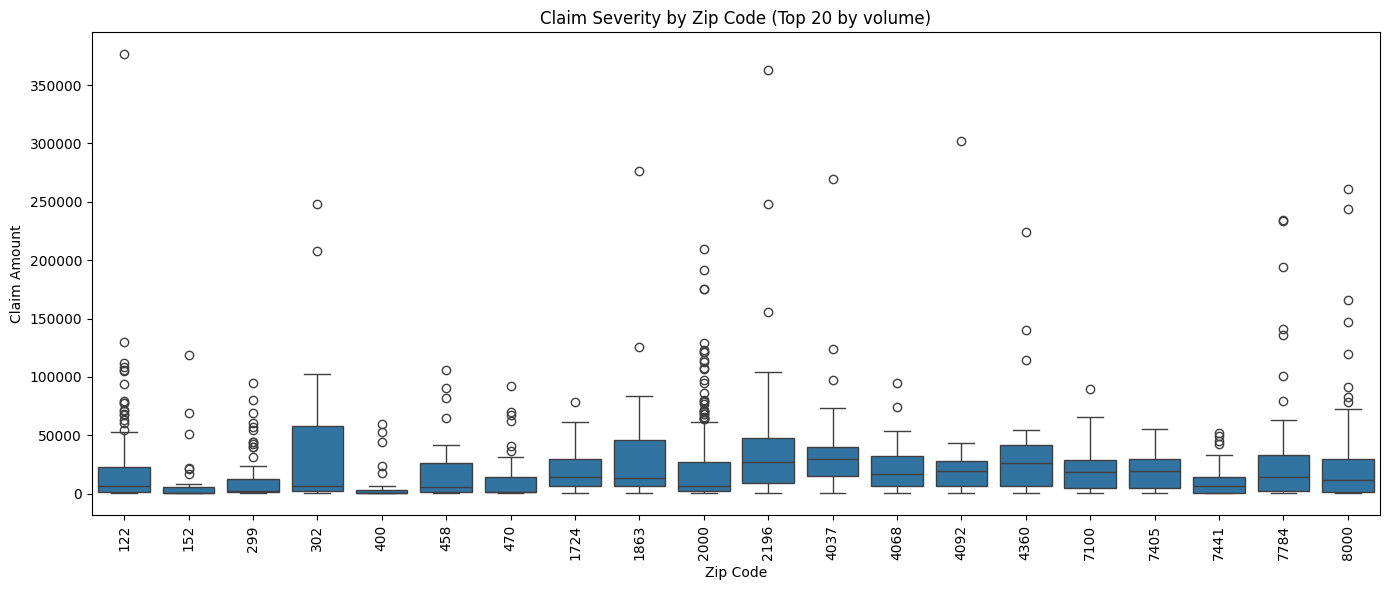

In [18]:
# Filter for policies with claims
df_with_claims = df_clean[df_clean["TotalClaims"] > 0]

# Optional: Keep top N zip codes with most claims to avoid clutter
top_zips = df_with_claims["PostalCode"].value_counts().head(20).index

plt.figure(figsize=(14, 6))
sns.boxplot(
    x="PostalCode", 
    y="TotalClaims", 
    data=df_with_claims[df_with_claims["PostalCode"].isin(top_zips)]
)
plt.xticks(rotation=90)
plt.title("Claim Severity by Zip Code (Top 20 by volume)")
plt.xlabel("Zip Code")
plt.ylabel("Claim Amount")
plt.tight_layout()
plt.show()


#### **3. H₀: There are no significant margin (profit) differences between zip codes**

In [19]:
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]
df_margin = df.dropna(subset=["PostalCode", "Margin"])
from scipy.stats import kruskal

# Only test zip codes with enough data (e.g., at least 5 policies)
zip_counts = df_margin["PostalCode"].value_counts()
valid_zips = zip_counts[zip_counts >= 5].index

# Prepare data for Kruskal-Wallis
margin_groups = [
    df_margin[df_margin["PostalCode"] == z]["Margin"].values
    for z in valid_zips
]

# Run test
stat, p_val_margin = kruskal(*margin_groups)
print(f"Kruskal-Wallis p-value for margin across zip codes: {p_val_margin:.4f}")


Kruskal-Wallis p-value for margin across zip codes: 0.0000


#### **4. H₀:There are not significant risk difference between Women and Men**

In [20]:
df_gender = df.dropna(subset=["Gender", "TotalClaims"])
df_gender["HasClaim"] = df_gender["TotalClaims"] > 0


C:\Users\hanna\AppData\Local\Temp\ipykernel_3020\3123840117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender["HasClaim"] = df_gender["TotalClaims"] > 0


In [23]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
# Filter to only Male and Female
df_gender_filtered = df_gender[df_gender["Gender"].isin(["Male", "Female"])]

# Recount with filtered data
gender_claims = df_gender_filtered.groupby("Gender")["HasClaim"].agg(["sum", "count"])
successes = gender_claims["sum"].values
totals = gender_claims["count"].values

from statsmodels.stats.proportion import proportions_ztest
stat, p_val_freq = proportions_ztest(count=successes, nobs=totals)

print(f"p-value for claim frequency between genders: {p_val_freq:.4f}")



p-value for claim frequency between genders: 0.8405


In [22]:
from scipy.stats import mannwhitneyu

df_with_claims = df_gender[df_gender["HasClaim"]]

# Split claim amounts by gender
female_claims = df_with_claims[df_with_claims["Gender"] == "Female"]["TotalClaims"]
male_claims = df_with_claims[df_with_claims["Gender"] == "Male"]["TotalClaims"]

# Use Mann-Whitney U test (non-parametric)
stat, p_val_severity = mannwhitneyu(female_claims, male_claims, alternative='two-sided')
print(f"p-value for claim severity between genders: {p_val_severity:.4f}")


p-value for claim severity between genders: 0.2235
